Matplotlib is building the font cache; this may take a moment.


Closed-form theta (intercept, slope): [3.10520115 3.98438579]
Gradient Descent theta (intercept, slope): [3.10520115 3.98438579]
Difference (GD - Closed): [-2.44311238e-11  7.60502772e-12]


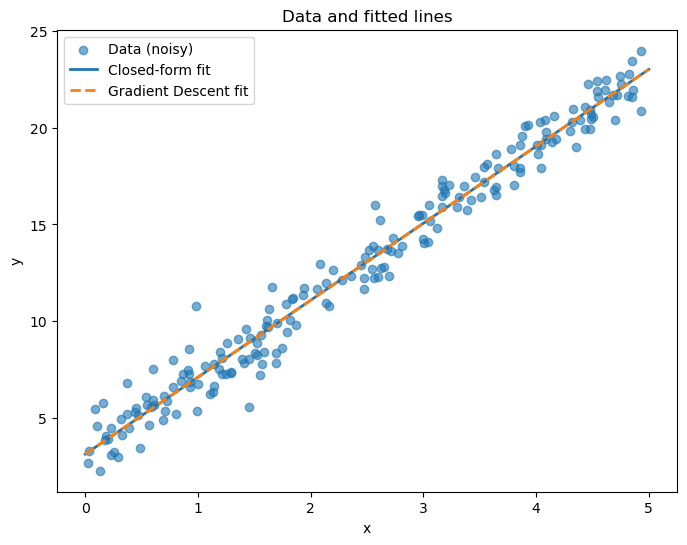

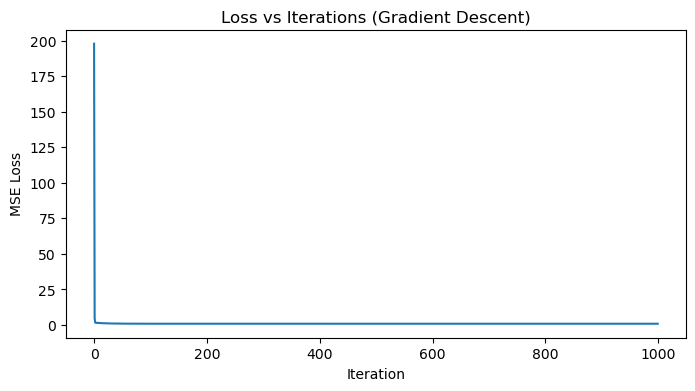

In [1]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate synthetic data
m = 200
x = np.random.uniform(0, 5, size=m)
noise = np.random.normal(0, 1.0, size=m)
y = 3 + 4*x + noise

# Add bias column
X = np.column_stack((np.ones(m), x))

# Closed-form (Normal Equation)
theta_closed = np.linalg.inv(X.T @ X) @ X.T @ y

# Gradient Descent implementation
theta_gd = np.array([0.0, 0.0])
eta = 0.05
n_iters = 1000
loss_history = []

for it in range(n_iters):
    y_pred = X @ theta_gd
    error = y - y_pred
    loss = (1/m) * np.sum(error**2)
    loss_history.append(loss)
    grad = -(2/m) * (X.T @ error)
    theta_gd = theta_gd - eta * grad

print("Closed-form theta (intercept, slope):", theta_closed)
print("Gradient Descent theta (intercept, slope):", theta_gd)
print("Difference (GD - Closed):", theta_gd - theta_closed)

# Plot raw data and fitted lines
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6, label='Data (noisy)')
xs = np.linspace(0,5,100)
ys_closed = theta_closed[0] + theta_closed[1]*xs
ys_gd = theta_gd[0] + theta_gd[1]*xs
plt.plot(xs, ys_closed, label='Closed-form fit', linewidth=2)
plt.plot(xs, ys_gd, linestyle='--', label='Gradient Descent fit', linewidth=2)
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.title('Data and fitted lines')
plt.show()

# Plot loss curve
plt.figure(figsize=(8,4))
plt.plot(range(n_iters), loss_history)
plt.xlabel('Iteration'); plt.ylabel('MSE Loss'); plt.title('Loss vs Iterations (Gradient Descent)')
plt.show()
